# Gemini API - read a PDF

This notebook demonstrates how you can convert a PDF file so that it can be read by the Gemini API.

## Setup

In [1]:
!pip install -Uq google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 8.5 MB/s eta 0:00:00


In [2]:
import google.generativeai as genai

import pathlib
import tqdm
import os

In [3]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')

genai.configure()

In [4]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Install the PDF processing tools:

In [5]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (721 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


## Download and proces the PDF

This textbook is from OpenStax, it's License is Commons Attribution License v4.0. More detrails are [available on the site](https://openstax.org/details/books/university-physics-volume-2).

In [8]:
!curl -o test.pdf https://assets.openstax.org/oscms-prodcms/media/documents/UniversityPhysicsVolume2-WEB_5eNhMSa.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59.2M  100 59.2M    0     0   115M      0 --:--:-- --:--:-- --:--:--  115M


You'll extract Chapter 3, pages [121-154].

In [6]:
first = 121
last = 154

In [9]:
!mkdir output
# extract images of Chapter 3
!pdftoppm test.pdf -f {first} -l {last} output/images -jpeg #pdf sayfalarını ppm(portable pixmap) formatında resimlere (jpeg, png etc) dönüştürür.
!ls output

images-121.jpg	images-127.jpg	images-133.jpg	images-139.jpg	images-145.jpg	images-151.jpg
images-122.jpg	images-128.jpg	images-134.jpg	images-140.jpg	images-146.jpg	images-152.jpg
images-123.jpg	images-129.jpg	images-135.jpg	images-141.jpg	images-147.jpg	images-153.jpg
images-124.jpg	images-130.jpg	images-136.jpg	images-142.jpg	images-148.jpg	images-154.jpg
images-125.jpg	images-131.jpg	images-137.jpg	images-143.jpg	images-149.jpg
images-126.jpg	images-132.jpg	images-138.jpg	images-144.jpg	images-150.jpg


Bu kod parçası, "test.pdf" adlı bir PDF dosyasından belirli sayfalardan (first ve last değişkenleri tarafından tanımlanan) görüntüleri çıkarır ve "output" adlı bir dizine kaydeder.

1. `!mkdir output`: Bu komut, "output" adlı bir dizin oluşturur. Bu dizin, çıkarılan görüntülerin saklanacağı yerdir.
2. `!pdftoppm test.pdf -f {first} -l {last} output/images -jpeg`: Bu komut, pdftoppm aracını kullanarak PDF dosyasından sayfaları çıkarır.
   - `test.pdf`: sayfaların çıkarılacağı PDF dosyası.
   - `-f {first}`: Çıkarılacak ilk sayfa numarası. Bu, first değişkeni tarafından belirlenir.
   - `-l {last}`: Çıkarılacak son sayfa numarası. Bu, last değişkeni tarafından belirlenir.
   - `output/images`: Çıkarılan sayfaların kaydedileceği dizin. Bu, "output" dizini içinde "images" adlı bir alt dizindir.
   - `-jpeg`: Çıkarılan sayfaların/görüntülerin JPEG formatında kaydedileceğini belirtir.
3. `!ls output`: Bu komut, "output" dizininin içeriğini listeler. Bu, çıkarılan görüntülerin mevcut olup olmadığını kontrol etmenizi sağlar.

bu kod parçası pdftoppm aracını kullanarak bir PDF dosyasındaki belirli sayfaları çıkarır ve bu sayfaları JPEG formatında  kaydeder. Bu kodun çalışması için bilgisayarınızda pdftoppm aracının kurulu olması gerekir.

Not: first ve last değişkenleri yer tutuculardır. Bu değişkenlere, çıkarmak istediğiniz bölümün ilk ve son sayfa numaralarını atamanız gerekir.

Look at the first image, scaled down:

In [10]:
import PIL.Image

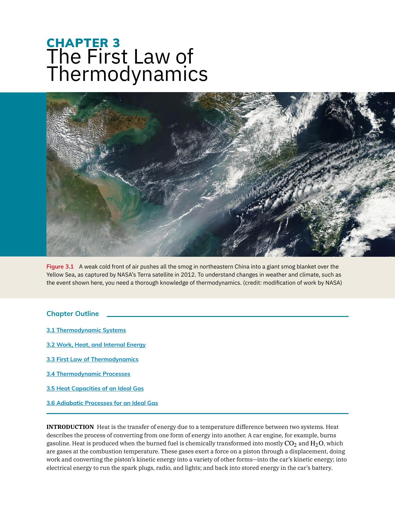

In [11]:
img = PIL.Image.open(f"output/images-{first}.jpg")
img.thumbnail([512, 512])
img

## Extract the text for thopse same pages.

In [12]:
for page_number in range(first,last+1):
  page_number = f"{page_number:03d}"
  ! pdftotext  test.pdf -f {page_number} -l {page_number}
  ! mv test.txt output/text-{page_number}.txt

Bu kod parçası, "test.pdf" adlı PDF dosyasındaki belirtilen sayfa aralığındaki ( `first` ve `last` değişkenleriyle belirtilen) her bir sayfanın metnini çıkarıp "output" adlı bir dizine kaydeder.

* **`for page_number in range(first,last+1):`**: Bu döngü, `first` değişkeninden `last` değişkenine (dahil) kadar olan tüm sayfa numaralarını işler.
* **`page_number = f"{page_number:03d}"`**: Bu satır, `page_number` değişkenini üç basamaklı bir sayıya çevirir. Örneğin, 1 sayısı "001" olarak, 10 sayısı "010" olarak ve 100 sayısı "100" olarak kaydedilir. Bu, çıktı dosya isimlerinde tutarlılık sağlamak için yapılır.
* **`! pdftotext  test.pdf -f {page_number} -l {page_number}`**: Bu komut, `pdftotext` aracını kullanarak "test.pdf" dosyasının belirtilen `page_number` sayfasındaki metni çıkarır ve default olarak "test.txt" adlı bir dosyaya kaydeder.
* **`! mv test.txt output/text-{page_number}.txt`**: Bu komut, "test.txt" dosyasını "output" dizinine taşır ve "text-{page_number}.txt" adını verir.

In [13]:
!ls output

images-121.jpg	images-133.jpg	images-145.jpg	text-123.txt  text-135.txt  text-147.txt
images-122.jpg	images-134.jpg	images-146.jpg	text-124.txt  text-136.txt  text-148.txt
images-123.jpg	images-135.jpg	images-147.jpg	text-125.txt  text-137.txt  text-149.txt
images-124.jpg	images-136.jpg	images-148.jpg	text-126.txt  text-138.txt  text-150.txt
images-125.jpg	images-137.jpg	images-149.jpg	text-127.txt  text-139.txt  text-151.txt
images-126.jpg	images-138.jpg	images-150.jpg	text-128.txt  text-140.txt  text-152.txt
images-127.jpg	images-139.jpg	images-151.jpg	text-129.txt  text-141.txt  text-153.txt
images-128.jpg	images-140.jpg	images-152.jpg	text-130.txt  text-142.txt  text-154.txt
images-129.jpg	images-141.jpg	images-153.jpg	text-131.txt  text-143.txt
images-130.jpg	images-142.jpg	images-154.jpg	text-132.txt  text-144.txt
images-131.jpg	images-143.jpg	text-121.txt	text-133.txt  text-145.txt
images-132.jpg	images-144.jpg	text-122.txt	text-134.txt  text-146.txt


In [14]:
!cat output/text-{first}.txt
#!cat:bir dosyanın içeriğini ekrana yazdırmak için kullanılan bir komut satırı komutudur.

CHAPTER 3

The First Law of
Thermodynamics

Figure 3.1 A weak cold front of air pushes all the smog in northeastern China into a giant smog blanket over the
Yellow Sea, as captured by NASA’s Terra satellite in 2012. To understand changes in weather and climate, such as
the event shown here, you need a thorough knowledge of thermodynamics. (credit: modification of work by NASA)

Chapter Outline
3.1 Thermodynamic Systems
3.2 Work, Heat, and Internal Energy
3.3 First Law of Thermodynamics
3.4 Thermodynamic Processes
3.5 Heat Capacities of an Ideal Gas
3.6 Adiabatic Processes for an Ideal Gas

INTRODUCTION Heat is the transfer of energy due to a temperature difference between two systems. Heat
describes the process of converting from one form of energy into another. A car engine, for example, burns
gasoline. Heat is produced when the burned fuel is chemically transformed into mostly
and
which
are gases at the combustion temperature. These gases exert a force on a piston through a displacem

## Assemble the files into a prompt

Upload all the files usng the files API, there are too many to send with the `generate_content` request.

In [15]:
list(pathlib.Path("output").glob('images-*.jpg'))

[PosixPath('output/images-138.jpg'),
 PosixPath('output/images-140.jpg'),
 PosixPath('output/images-136.jpg'),
 PosixPath('output/images-150.jpg'),
 PosixPath('output/images-153.jpg'),
 PosixPath('output/images-123.jpg'),
 PosixPath('output/images-144.jpg'),
 PosixPath('output/images-152.jpg'),
 PosixPath('output/images-148.jpg'),
 PosixPath('output/images-145.jpg'),
 PosixPath('output/images-126.jpg'),
 PosixPath('output/images-154.jpg'),
 PosixPath('output/images-122.jpg'),
 PosixPath('output/images-135.jpg'),
 PosixPath('output/images-125.jpg'),
 PosixPath('output/images-147.jpg'),
 PosixPath('output/images-130.jpg'),
 PosixPath('output/images-142.jpg'),
 PosixPath('output/images-149.jpg'),
 PosixPath('output/images-131.jpg'),
 PosixPath('output/images-146.jpg'),
 PosixPath('output/images-139.jpg'),
 PosixPath('output/images-129.jpg'),
 PosixPath('output/images-134.jpg'),
 PosixPath('output/images-133.jpg'),
 PosixPath('output/images-151.jpg'),
 PosixPath('output/images-128.jpg'),
 

In [17]:
import pathlib
import tqdm
files = []
image_files = list(pathlib.Path("output").glob('images-*.jpg'))
for img in tqdm.tqdm(image_files):
    files.append(genai.upload_file(img))

100%|██████████| 34/34 [01:11<00:00,  2.09s/it]


Bu kod parçası, "output" dizininde bulunan tüm "images-*.jpg" uzantılı resim dosyalarını alır, bunları File API'ye yükler ve dosyaların URL'lerini bir listeye kaydeder.

* **`files = []`**: Bu satır, dosya URL'lerini saklamak için boş bir liste oluşturur.
* **`image_files = list(pathlib.Path("output").glob('images-*.jpg'))`**: Bu satır, "output" dizininde bulunan tüm "images-*.jpg" uzantılı resim dosyalarının bir listesini oluşturur. `pathlib.Path` ve `glob` fonksiyonları, dosya ve dizinleri yönetmek için kullanılır.
* **`for img in tqdm.tqdm(image_files):`**: Bu döngü, `image_files` listesindeki her bir resim dosyasını işler. `tqdm` kütüphanesi, döngünün ilerleme durumunu göstermek için bir ilerleme çubuğu ekler.
* **`files.append(genai.upload_file(img))`**: Bu satır, `img` değişkeninde bulunan resim dosyasını File API'ye yükler ve yüklenen dosyayı `files` listesine ekler.


In [18]:
files

[genai.File({
     'name': 'files/mpfsfogztfji',
     'display_name': 'images-138.jpg',
     'mime_type': 'image/jpeg',
     'sha256_hash': 'ZDU2ZmVjMzcyOTUwNjM4NTlhMjczNDQxMjJmZDFjNTllOGUzYmI3ZTdkMzFmZmQ3YWZmYjYyMzc3ZGQyODZhNA==',
     'size_bytes': '236078',
     'state': 'ACTIVE',
     'uri': 'https://generativelanguage.googleapis.com/v1beta/files/mpfsfogztfji',
     'create_time': '2024-07-17T10:41:12.851654Z',
     'expiration_time': '2024-07-19T10:41:12.701140077Z',
     'update_time': '2024-07-17T10:41:12.851654Z'}),
 genai.File({
     'name': 'files/fsbl4hktuolm',
     'display_name': 'images-140.jpg',
     'mime_type': 'image/jpeg',
     'sha256_hash': 'YWVkMmExYzVkZWE4YTIyOTZmZTNjMmQ1YmZjMDIyM2Q2NjYwMzBmYjFiNjhkYjUxNDBhYzdlY2VkMTNiNWVjZg==',
     'size_bytes': '158060',
     'state': 'ACTIVE',
     'uri': 'https://generativelanguage.googleapis.com/v1beta/files/fsbl4hktuolm',
     'create_time': '2024-07-17T10:41:15.025530Z',
     'expiration_time': '2024-07-19T10:41:14.888653

## Load all the texts:

In [19]:
texts = [t.read_text() for t in pathlib.Path("output").glob('text-*.txt')]

## Interleave the page-numbers, texts, and image-file references:

In [20]:
textbook = []
for page, (text, image) in enumerate(zip(texts, files)):
  textbook.append(f'## Page {first+page} ##')
  textbook.append(text)
  textbook.append(image)

In [21]:
textbook[:3]

['## Page 121 ##',
 '3.5 • Heat Capacities of an Ideal Gas\n\nFigure 3.11\n\nAn insulated piston with a hot, compressed gas is released. The piston moves up, the volume expands, and the pressure and\n\ntemperature decrease. The internal energy goes into work. If the expansion occurs within a time frame in which negligible heat can enter\nthe system, then the process is called adiabatic. Ideally, during an adiabatic process no heat enters or exits the system.\n\nCyclic Processes\nWe say that a system goes through a cyclic process if the state of the system at the end is same as the state at\nthe beginning. Therefore, state properties such as temperature, pressure, volume, and internal energy of the\nsystem do not change over a complete cycle:\n\nWhen the first law of thermodynamics is applied to a cyclic process, we obtain a simple relation between heat\ninto the system and the work done by the system over the cycle:\n\nThermodynamic processes are also distinguished by whether or not th

## Try it out

In [22]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash-latest',
                              system_instruction="You are an expert at summarizing of physics text. perform digest with 500 tokens"
                              )

In [23]:
response = model.generate_content(
    ['# Here is a chapter from a physics text book:']+
    textbook +
    ["[END]\n\nPlease sumarize it"],
    generation_config=genai.types.GenerationConfig(
                                                    # Only one candidate for now.
                                                    candidate_count=1, # generated output count.
                                                    max_output_tokens=1024,
                                                    temperature=0,
                                                    top_p=1)
)

Bu kod parçası, bir GenAI modelini kullanarak bir fizik ders kitabı metninin özetini oluşturur.


* **`['# Here is a chapter from a physics text book:']`**: Bu liste, GenAI modeline metnin bir fizik ders kitabı bölümünden geldiğini belirten bir başlık ekler.
* **`textbook`**: Bu değişken, fizik ders kitabı metnini içerir.
* **`["[END]\n\nPlease sumarize it"]`**: Bu liste, GenAI modeline metnin sonunu belirten bir işaret (\[END]) ve metnin özetlenmesini isteyen bir talimat ekler.

In [24]:
from IPython.display import Markdown
to_markdown(response.text)

> This chapter of a physics textbook introduces the concept of thermodynamics, which is the study of how energy is transferred and transformed in physical systems. It begins by defining a thermodynamic system, its boundary, and its surroundings. The chapter then discusses the concepts of work, heat, and internal energy, and how they are related by the first law of thermodynamics. The first law states that the change in internal energy of a system is equal to the heat added to the system minus the work done by the system. The chapter then explores different types of thermodynamic processes, including isothermal, adiabatic, isobaric, and isochoric processes. It also discusses the heat capacities of an ideal gas and how they are related to the number of degrees of freedom of the molecules in the gas. Finally, the chapter concludes with a discussion of adiabatic processes, which are processes in which no heat is transferred to or from the system.